In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image,ImageOps
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import os
os.chdir('/home/omkar/CNN proj/archive')




2021-11-26 16:24:07.110904: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/omkar/.local/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-26 16:24:07.110991: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
training_data=[]
classes=43
cur_path = os.getcwd()
for i in range(classes):     
    path = os.path.join(cur_path,'train',str(i))     
    images = os.listdir(path)
    for a in images:
        try:
            
            img_array = cv2.imread(path +'/'+ a,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array = cv2.resize(img_array, (30, 30))
            training_data.append([new_array,i])
        
        except Exception as e:
            print(e)

In [3]:
print(len(training_data))

39209


In [15]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, 30, 30, 1)
y = np.array(y)

In [5]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(31367, 30, 30, 1) (7842, 30, 30, 1) (31367,) (7842,)


In [6]:
y_train = to_categorical(y_train,43) 
y_test = to_categorical(y_test,43)

In [7]:
y_train.shape,y_test.shape

((31367, 43), (7842, 43))

In [8]:
X = X/255.0

In [9]:
model =Sequential() 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:])) 
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(rate=0.25)) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25)) 

model.add(Flatten()) 

model.add(Dense(256, activation='relu')) 
model.add(Dropout(rate=0.5))

# We have 43 classes that's why we have defined 43in the dense 
model.add(Dense(43, activation='softmax'))

2021-11-26 16:25:22.327533: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-26 16:25:22.327582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (omkar-Lenovo-ideapad-520-15IKB): /proc/driver/nvidia/version does not exist
2021-11-26 16:25:22.328059: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
#Compilation of the model 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

2021-11-26 16:25:22.656911: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
981/981 [==============================] - 51s 51ms/step - loss: 1.8774 - accuracy: 0.5136 - val_loss: 0.4922 - val_accuracy: 0.8710
Epoch 2/20
981/981 [==============================] - 61s 62ms/step - loss: 0.6369 - accuracy: 0.8066 - val_loss: 0.1766 - val_accuracy: 0.9531
Epoch 3/20
981/981 [==============================] - 71s 73ms/step - loss: 0.3572 - accuracy: 0.8972 - val_loss: 0.0974 - val_accuracy: 0.9736
Epoch 4/20
981/981 [==============================] - 73s 74ms/step - loss: 0.2506 - accuracy: 0.9276 - val_loss: 0.0743 - val_accuracy: 0.9809
Epoch 5/20
981/981 [==============================] - 75s 76ms/step - loss: 0.2222 - accuracy: 0.9355 - val_loss: 0.0628 - val_accuracy: 0.9844
Epoch 6/20
981/981 [==============================] - 66s 67ms/step - loss: 0.1858 - accuracy: 0.9463 - val_loss: 0.0794 - val_accuracy: 0.9810
Epoch 7/20
981/981 [==============================] - 78s 80ms/step - loss: 0.1887 - accuracy: 0.9461 - val_loss: 0.0557 - val_accuracy:

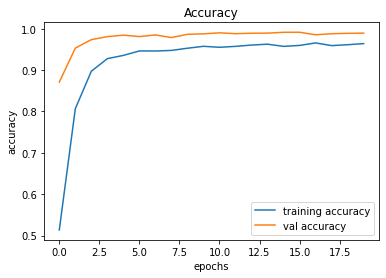

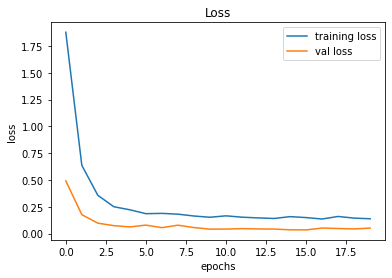

In [11]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
model.save("./training/TSR.h5")

In [13]:
df = pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,1.877358,0.513597,0.492176,0.870951
1,0.636878,0.806580,0.176636,0.953073
2,0.357205,0.897153,0.097391,0.973604
3,0.250607,0.927631,0.074315,0.980872
4,0.222218,0.935505,0.062804,0.984443
5,0.185785,0.946281,0.079394,0.981000
6,0.188694,0.946058,0.055662,0.984953
7,0.181436,0.947524,0.078621,0.978577
8,0.164175,0.952785,0.056460,0.986483
9,0.152621,0.957471,0.041751,0.987631


In [14]:
print(f"Accuracy: {df['val_accuracy'][19]*100} %")

Accuracy: 98.92884492874146 %
